In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
!git clone https://github.com/shikhar2402/Geoffrey-Hinton-Fellowship-for-Artificial-Intelligence-AI-Hackathon-Univ.AI.git

Cloning into 'Geoffrey-Hinton-Fellowship-for-Artificial-Intelligence-AI-Hackathon-Univ.AI'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
import pandas as pd
test=pd.read_csv("/content/Geoffrey-Hinton-Fellowship-for-Artificial-Intelligence-AI-Hackathon-Univ.AI/Test Data (2).csv")
train=pd.read_csv("/content/Geoffrey-Hinton-Fellowship-for-Artificial-Intelligence-AI-Hackathon-Univ.AI/Training Data (2).csv")

train_copy = train.copy()
test_copy  = test.copy()

In [ ]:
train

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train["risk_flag"].sum()

30996

In [ ]:
train[train["married"]=="single"]["risk_flag"].sum()

28360

In [ ]:
train[train["married"]=="married"]["risk_flag"].sum()

2636

Data is highly unbalanced. We have to create synthetic data points.

In [ ]:
sns.countplot(x='risk_flag', data=train);

In [ ]:
sns.factorplot(x='risk_flag', col='married', kind='count', data=train);

singles tend to do more fraud.

In [ ]:
sns.factorplot(x='state', col='risk_flag', kind='count', data=train);

In [ ]:
sns.factorplot(x='risk_flag', col='car_ownership', kind='count', data=train)

In [ ]:
sns.factorplot(x='risk_flag', col='house_ownership', kind='count', data=train)

In [ ]:
for i in range(20 , 60 , 5):
  print("age greater than" , i , "crime percentage" , train[train["age"]>=i]["risk_flag"].sum()/train["risk_flag"].sum())



age greater than 20 crime percentage 1.0
age greater than 25 crime percentage 0.9182152535811072
age greater than 30 crime percentage 0.8151696993160408
age greater than 35 crime percentage 0.7283520454252161
age greater than 40 crime percentage 0.6509226997031875
age greater than 45 crime percentage 0.5772680345851078
age greater than 50 crime percentage 0.4879339269583172
age greater than 55 crime percentage 0.40837527422893277


In [ ]:
sns.distplot(train["age"], kde=False)
plt.show()

In [ ]:
sns.distplot((train["income"]) , kde=False)
plt.show()

In [ ]:
sns.distplot(np.log(train["income"]) , kde=False)
plt.show()

In [ ]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [ ]:
for i in range(0 , 15 , 2):
  print(i ,"to",i+2 , "  crime percentage ->" , train[(train["current_job_years"]>=i) & (train["current_job_years"]<=i+2)]["risk_flag"].sum()/train["risk_flag"].sum())

2-8 years old employee tend to commit more crime

In [ ]:
for i in range(10 , 15 , 1):
  print(i , "  crime percentage ->" , train[(train["current_house_years"]==i) ]["risk_flag"].sum()/train["risk_flag"].sum())

In [ ]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);


In [ ]:
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  

In [ ]:
data_tuples=[]
for i in range(0 , 18 , 1):
  print(i , i+1)
  data_tuples.append( (i , train[(train["experience"]-train["current_job_years"]>=i)  & (train["experience"]-train["current_job_years"]<i+1)]["risk_flag"].sum()/train["risk_flag"].sum()) )

In [ ]:
print(data_tuples)

[(0, 0.49435411020776876), (1, 0.04058588204929668), (2, 0.04684475416182733), (3, 0.04481223383662408), (4, 0.04778035875596851), (5, 0.052071234998064264), (6, 0.037972641631178215), (7, 0.03861788617886179), (8, 0.04152148664343786), (9, 0.03245580074848368), (10, 0.028132662279003743), (11, 0.02155116789263131), (12, 0.020938185572331913), (13, 0.019002451929281197), (14, 0.011485352948767583), (15, 0.01064653503677894), (16, 0.008452703574654795), (17, 0.00277455155503936)]


In [ ]:
df = pd.DataFrame(data_tuples, columns =['Difference_b/t_exp_employee' , 'Percent_Difference_b/t_exp_employee'])

In [ ]:
test=test.rename(columns={"id": "Id"})
data = train.append(test, sort = False)


In [ ]:
data["Difference_b/t_exp_employee"]=data["experience"]-data["current_job_years"]
data["Difference_b/t_age_house"]=(data["age"]-data["current_house_years"])

In [ ]:
data

In [ ]:
import re
def remove_tags(string):
    result = re.sub('[0-9]','',string)
    str=""
    for ch in result:
      if ch!='[':
        str+=ch
    str2=""
    for ch in str:
      if ch!=']':
        str2+=ch
    return str2
data.city=data.city.apply(lambda cw : remove_tags(cw))

In [ ]:
data.loc[(data["state"]=="Uttar_Pradesh[5]") | (data["state"]=="Uttar Pradesh[5]") | (data["state"]=="Uttar Pradesh") ,"state"] = "Uttar_Pradesh"
data.loc[(data["state"]=="Andhra Pradesh")  ,"state"] = "Andhra_Pradesh"
data.loc[(data["state"]=="Himachal Pradesh") ,"state"] = "Himachal_Pradesh"
data.loc[(data["state"]=="Jammu and Kashmir")  ,"state"] = "Jammu_and_Kashmir"
data.loc[(data["state"]=="Madhya Pradesh") ,"state"] = "Madhya_Pradesh"
data.loc[(data["state"]=="Tamil Nadu") ,"state"] = "Tamil_Nadu"
data.loc[(data["state"]=="West Bengal")  ,"state"] = "West_Bengal"

In [ ]:
state_grouping = data.groupby(['state'])

In [ ]:
state_grouping_mean  = state_grouping["current_job_years" ,	"current_house_years"].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
state_grouping_mean.columns = ['state' ,'current_job_years_mean' , 'current_house_years_mean']

In [ ]:
data = data.merge(state_grouping_mean, on = [ 'state' ],how='left' )

In [ ]:
car_grouping = data.groupby(['car_ownership' , 'house_ownership'])["income" , "risk_flag"].sum().reset_index()
car_grouping

In [ ]:
car_grouping["risk_flag"]=car_grouping["risk_flag"]/train["risk_flag"].sum()
car_grouping["income"]=car_grouping["income"]/train["income"].sum()

In [ ]:
car_grouping

,car_ownership,house_ownership,income__mean,risk_flag_mean
0,no,norent_noown,0.020147,0.015518
1,no,owned,0.038278,0.028778
2,no,rented,0.717262,0.683572
3,yes,norent_noown,0.009390,0.007549
4,yes,owned,0.018882,0.008646
5,yes,rented,0.307874,0.255936


In [ ]:
car_grouping.columns = ['car_ownership' , 'house_ownership' , "income__mean" ,"risk_flag_mean"]

In [ ]:
data = data.merge(car_grouping, on = [ 'car_ownership' , 'house_ownership' ],how='left' )

In [ ]:
data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,Difference_b/t_exp_employee,current_job_years_mean,current_house_years_mean,Difference_b/t_age_house,income__mean,risk_flag_mean
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,0,6.590715,12.012499,10,0.717262,0.683572
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0,1,6.405502,11.935968,27,0.717262,0.683572
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0.0,0,5.919110,12.071014,56,0.717262,0.683572
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1.0,0,6.432401,12.014763,29,0.307874,0.255936
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1.0,8,6.556627,11.987109,33,0.717262,0.683572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,27996,9955481,57,13,single,rented,no,Statistician,Eluru,Andhra_Pradesh,5,10,NaN,8,6.204467,11.941814,47,0.717262,0.683572
279996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya_Pradesh,9,14,NaN,0,6.590715,12.012499,33,0.717262,0.683572
279997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,NaN,1,6.405502,11.935968,11,0.717262,0.683572
279998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,NaN,0,6.075644,12.104684,37,0.307874,0.255936


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['city','profession','married'	,'house_ownership'	,'car_ownership','state']:
    data[col]=  data[col].astype('str')
    data[col]= le.fit_transform(data[col])
data

In [ ]:
data.drop(['Id', 'risk_flag'], axis=1, inplace=True)


In [ ]:
data["income"]=np.log(data["income"])

In [ ]:
train.shape

(252000, 13)

In [ ]:
data

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,Difference_b/t_exp_employee,current_job_years_mean,current_house_years_mean,Difference_b/t_age_house,income__mean,risk_flag_mean
0,14.080820,23,3,1,2,0,46,181,13,3,13,0,6.590715,12.012499,10,0.717262,0.683572
1,15.840300,40,10,1,2,0,60,152,14,9,13,1,6.405502,11.935968,27,0.717262,0.683572
2,15.199757,66,4,0,2,0,65,310,12,4,10,0,5.919110,12.071014,56,0.717262,0.683572
3,15.649124,41,2,1,2,1,60,282,17,2,12,0,6.432401,12.014763,29,0.307874,0.255936
4,15.567987,47,11,1,2,0,10,237,22,3,14,8,6.556627,11.987109,33,0.717262,0.683572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,16.113634,57,13,1,2,0,61,323,0,5,10,8,6.204467,11.941814,47,0.717262,0.683572
279996,14.886328,47,9,1,2,0,64,177,13,9,14,0,6.590715,12.012499,33,0.717262,0.683572
279997,15.905201,24,5,1,2,0,41,106,14,4,13,1,6.405502,11.935968,11,0.717262,0.683572
279998,16.064081,51,13,1,2,1,2,274,4,13,14,0,6.075644,12.104684,37,0.307874,0.255936


In [ ]:
data_copy = data.copy(deep = True)

In [ ]:
X_train=data.iloc[:252000 , :]
X_test=data.iloc[252000: , :]
Y_train=train["risk_flag"]

In [ ]:
print(X_train.shape , X_test.shape , Y_train.shape)

(252000, 17) (28000, 17) (252000, 1)


In [ ]:
Y_train=Y_train.values.reshape(-1 , 1)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.10, random_state=12)

#feature scaling
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  AdaBoostClassifier

model =  LogisticRegression(random_state=2001)

clf4 = AdaBoostClassifier(base_estimator =model, n_estimators=2000, learning_rate =0.2)
rf = catboost.CatBoostClassifier(cat_features= [3,6,7,8,62],  max_depth=5, reg_lambda=3,
                                    verbose=True )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train , Y_train, cv = 10)
accuracy_lr = scores.mean()

In [ ]:
print(accuracy_lr)

0.877


In [ ]:
lr.fit(X_train , Y_train)
pred=lr.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[221004  30996]
 [     0      0]]


NameError: ignored

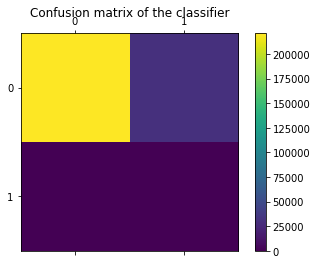

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(X_train, pred, Y_train)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, X_train , Y_train, cv = 10)
accuracy_knn = scores.mean()

print(accuracy_knn)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

0.8691944444444445


In [ ]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, scale_pos_weight=10)
model.fit(X_train , Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model.predict_proba(X_test)
outcome = model.predict(X_test)

In [ ]:
result = model.score(X_train, Y_train)
result

0.6322380952380953

In [ ]:
pred

array([[0.6747571 , 0.3252429 ],
       [0.5147791 , 0.48522088],
       [0.49031472, 0.5096853 ],
       ...,
       [0.4770081 , 0.5229919 ],
       [0.51969516, 0.48030487],
       [0.345882  , 0.654118  ]], dtype=float32)

In [ ]:
cnt=0
for i in outcome:
  cnt+=i

In [ ]:
cnt

19292

In [ ]:
X_test.shape

(28000, 17)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 1)
scores = cross_val_score(clf, X_train, Y_train, cv = 10)
accuracy_rf = scores.mean()

print(accuracy_rf)

clf = RandomForestClassifier(random_state = 1)

hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [3, 5],
    'n_estimators': [6, 9]
}

grid = GridSearchCV(clf, param_grid = hyperparameters, cv = 10)
grid.fit(all_X, all_y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.9009047619047619


NameError: ignored

In [ ]:

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)


In [ ]:
train["risk_flag"].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=3, sampling_strategy=0.4, random_state=11)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [ ]:
X_train.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'Difference_b/t_exp_employee',
       'current_job_years_mean', 'current_house_years_mean',
       'Difference_b/t_age_house', 'income__mean', 'risk_flag_mean'],
      dtype='object')

In [ ]:
X_res = pd.DataFrame(X_res, columns = ['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'Difference_b/t_exp_employee',
       'current_job_years_mean', 'current_house_years_mean',
       'Difference_b/t_age_house', 'income__mean', 'risk_flag_mean'])


In [ ]:
X_res

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,Difference_b/t_exp_employee,current_job_years_mean,current_house_years_mean,Difference_b/t_age_house,income__mean,risk_flag_mean
0,14.080820,23.000000,3.000000,1.0,2.0,0.00000,46.0,181.00000,13.00000,3.00000,13.000000,0.000000,6.590715,12.012499,10.000000,0.717262,0.683572
1,15.840300,40.000000,10.000000,1.0,2.0,0.00000,60.0,152.00000,14.00000,9.00000,13.000000,1.000000,6.405502,11.935968,27.000000,0.717262,0.683572
2,15.199757,66.000000,4.000000,0.0,2.0,0.00000,65.0,310.00000,12.00000,4.00000,10.000000,0.000000,5.919110,12.071014,56.000000,0.717262,0.683572
3,15.649124,41.000000,2.000000,1.0,2.0,1.00000,60.0,282.00000,17.00000,2.00000,12.000000,0.000000,6.432401,12.014763,29.000000,0.307874,0.255936
4,15.567987,47.000000,11.000000,1.0,2.0,0.00000,10.0,237.00000,22.00000,3.00000,14.000000,8.000000,6.556627,11.987109,33.000000,0.717262,0.683572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309400,13.227597,31.000000,15.000000,1.0,2.0,1.00000,43.0,203.00000,20.00000,12.00000,11.000000,3.000000,6.570338,12.114537,20.000000,0.307874,0.255936
309401,14.249554,44.000000,7.000000,1.0,2.0,0.00000,21.0,19.00000,27.00000,5.00000,13.000000,2.000000,6.265723,11.973309,31.000000,0.717262,0.683572
309402,16.010627,57.000000,8.000000,1.0,2.0,1.00000,65.0,119.00000,11.00000,8.00000,12.000000,0.000000,6.086798,11.915334,45.000000,0.307874,0.255936
309403,15.736942,29.000000,20.000000,0.0,2.0,1.00000,58.0,170.00000,6.00000,3.00000,14.000000,17.000000,6.419856,11.997711,15.000000,0.307874,0.255936


In [ ]:
cnt=0
for i in y_res:
  cnt+=i
print(cnt)

88401


In [ ]:
X_res.shape

(309405, 17)

In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score


In [ ]:
err=[]
feature_importance_df = pd.DataFrame()
y_pred_tot=[]
test_p=[]
train_p=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994) #15 is best
i=1
for train_index, test_index in fold.split(X_res,y_res):
    X_train1, X_test1 = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train1, y_test1 = y_res[train_index], y_res[test_index]
    m=LGBMClassifier(n_estimators=4500,random_state=1994,learning_rate=0.02,objective='binary',nthread= 3,scale_pos_weight=1,num_leaves=20,min_split_gain=0.3,
                 subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50,colsample_bytree=0.5)
    m.fit(X_train1,y_train1,eval_set=[(X_train1,y_train1),(X_test1, y_test1)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test1,num_iteration=m.best_iteration_)[:,-1]
#     tpreds=m.predict_proba(X_train,num_iteration=m.best_iteration_)[:,-1]
    
    print("err: ",roc_auc_score(y_test1,preds))
    err.append(roc_auc_score(y_test1,preds))
#     train_p.append(tpreds)
#     test_p.append(preds)
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.77062	training's binary_logloss: 0.525982	valid_1's auc: 0.763156	valid_1's binary_logloss: 0.527301
[400]	training's auc: 0.829062	training's binary_logloss: 0.497451	valid_1's auc: 0.820548	valid_1's binary_logloss: 0.499883
[600]	training's auc: 0.864715	training's binary_logloss: 0.473819	valid_1's auc: 0.855913	valid_1's binary_logloss: 0.477104
[800]	training's auc: 0.887372	training's binary_logloss: 0.454167	valid_1's auc: 0.878754	valid_1's binary_logloss: 0.458142
[1000]	training's auc: 0.902562	training's binary_logloss: 0.436729	valid_1's auc: 0.894505	valid_1's binary_logloss: 0.441037
[1200]	training's auc: 0.913689	training's binary_logloss: 0.421485	valid_1's auc: 0.906592	valid_1's binary_logloss: 0.425958
[1400]	training's auc: 0.920725	training's binary_logloss: 0.408303	valid_1's auc: 0.913868	valid_1's binary_logloss: 0.413007
[1600]	training's auc: 0.92673	training's binary_logl

In [ ]:
np.mean(err)


0.942555179288291

In [ ]:
ans=np.mean(y_pred_tot,0)


In [ ]:
ans

array([0.05613336, 0.10345843, 0.12608417, ..., 0.06363672, 0.25297506,
       0.50916745])

In [ ]:
np.mean(y_pred_tot,0)


array([0.05740507, 0.09698623, 0.07729082, ..., 0.05344999, 0.13733122,
       0.28406569])

In [ ]:
B=np.where(ans >= 0.5, 1, 0)
B

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
test_copy['risk_flag']=B

In [ ]:
test_copy['risk_flag'].value_counts()

0    24529
1     3471
Name: risk_flag, dtype: int64

In [ ]:
test_copy

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,0
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


In [ ]:
test_copy[['id','risk_flag']].to_csv('Univ.ai_Submission_3.csv',index=False)

In [ ]:
cnt=0
for i in B:
  cnt+=i
cnt

224

In [ ]:
m=LGBMClassifier(n_estimators=2500,random_state=1994,learning_rate=0.02,objective='binary',nthread= 3,scale_pos_weight=1,num_leaves=20,min_split_gain=0.3,
                 subsample_for_bin=20000,subsample=0.9,reg_alpha=10,reg_lambda=50,colsample_bytree=0.5)
# m=RidgeCV(cv=4)
m.fit(X_train,Y_train,eval_set=[(X_train,Y_train)],eval_metric='auc', early_stopping_rounds=200,verbose=200)


In [ ]:
p=m.predict_proba(X_train)[:,-1]

print(roc_auc_score(Y_train,p))


0.8886383162806286


In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X_train.columns), reverse=True)[:300], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier

errxgb=[]
y_pred_tot_xgb=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,Y_train):
    X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train1, y_test1 = Y_train[train_index], Y_train[test_index]
    m=XGBClassifier(n_estimators=5000,random_state=1994,eval_metric='auc',learning_rate=0.03)
    m.fit(X_train1,y_train1,eval_set=[(X_train1,y_train1),(X_test1, y_test1)], early_stopping_rounds=200,verbose=200)
    preds=m.predict_proba(X_test1)[:,-1]
    print("err_xgb: ",roc_auc_score(y_test1,preds))
    errxgb.append(roc_auc_score(y_test1,preds))
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot_xgb.append(p)


[0]	validation_0-auc:0.554282	validation_1-auc:0.552411
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.632329	validation_1-auc:0.614346
[400]	validation_0-auc:0.673551	validation_1-auc:0.65313
[600]	validation_0-auc:0.703288	validation_1-auc:0.67903
[800]	validation_0-auc:0.727016	validation_1-auc:0.702522
[1000]	validation_0-auc:0.746675	validation_1-auc:0.722668
[1200]	validation_0-auc:0.761234	validation_1-auc:0.736499
[1400]	validation_0-auc:0.776025	validation_1-auc:0.751184
[1600]	validation_0-auc:0.789807	validation_1-auc:0.764895
[1800]	validation_0-auc:0.800117	validation_1-auc:0.775592
[2000]	validation_0-auc:0.809999	validation_1-auc:0.785487
[2200]	validation_0-auc:0.818762	validation_1-auc:0.79425
[2400]	validation_0-auc:0.825253	validation_1-auc:0.801223
[2600]	validation_0-auc:0.833174	validation_1-auc:0.808344
[2800]	validation_0-auc:0.

KeyboardInterrupt: ignored